# ICE Core data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('Epica-tpt-co2.csv')

In [2]:
#data

In [3]:
data.rename(columns ={'BP':'Age'}, inplace = True)
data.columns

Index(['Age', 'Temperature', 'CO2', 'Milankovich'], dtype='object')

Testising the correlation between Temperature and the level of CO2

In [4]:
data1= data.dropna(subset=['Age', 'Temperature', 'CO2','Milankovich' ])
data1['Temperature'].corr(data1.CO2)
#data1['Age'].corr(data1.Milankovich)
#data1['CO2'].corr(data1.Milankovich)

0.88542275003469495

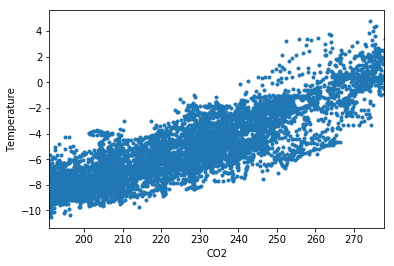

In [5]:
#data1.plot(x = 'Age' , y='CO2', style =".")
#data1.plot(x = 'Age' , y='Temperature', style =".-")
data1.plot(y = 'Temperature' , x='CO2', legend=False, style =".");
plt.ylabel('Temperature');

Manipulation of data using Numpy in order to model it. 

In [6]:
import numpy as np
Dlistx = data1.CO2.tolist()
Dlisty = data1.Temperature.tolist()
x = np.asarray(Dlistx)
X=x[:, np.newaxis]

Modelling the data using the linear regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Dlisty)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

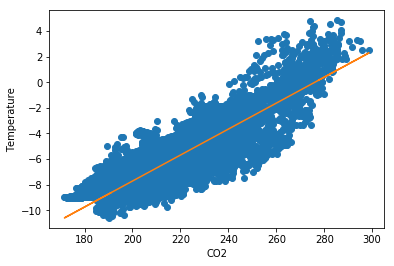

In [8]:
import matplotlib.pyplot as plt
y_fit = model.predict(X)
plt.plot(Dlistx, Dlisty, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Temperature');
plt.xlabel('CO2');

In [9]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)


0.783973446279


Modelling the same data using Ridge Regression 

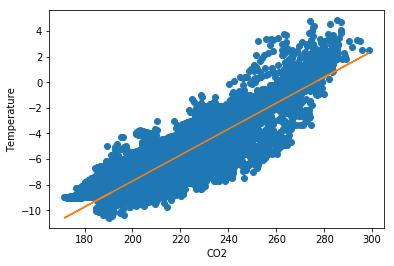

In [10]:
from sklearn import linear_model
model = linear_model.Ridge()

model.fit(X,Dlisty)
y_fit = model.predict(X)
plt.plot(Dlistx, Dlisty, 'o'); 
plt.plot(X,y_fit);
plt.ylabel('Temperature');
plt.xlabel('CO2');

In [11]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)

0.783973446279


Using simple linear regression and ridge regression we obtained the same residual. Therefore, to improve the residual we will use a better modelling technique Random Forest Regressor. 

Modelling the same data with Random Forest Regressor 

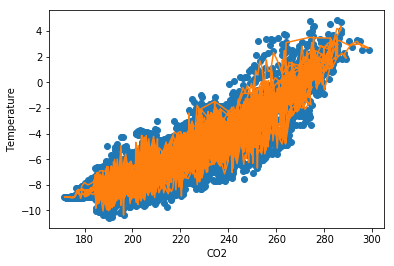

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


# Plot the data and the model prediction

model.fit(X, Dlisty)
y_fit = model.predict(X)

plt.plot(X, Dlisty, 'o')
plt.plot(X, y_fit);
plt.ylabel('Temperature');
plt.xlabel('CO2');

In [13]:
yresid = data1.Temperature - y_fit # residual 
SSresid = sum (pow(yresid,2))
SStotal = len(data1.Temperature)*np.var (data1.Temperature)
rsq = 1- SSresid/SStotal
print (rsq)

0.940339127662


We obtained a good residual!!!

Testing the model 

In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Dlisty, test_size=0.2, random_state=4);

C:\Users\My Computer\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:

model = RandomForestRegressor()




model.fit(x_train, y_train)
y_fit = model.predict(x_test)

#plt.plot(X, Dlisty, 'o')
#plt.plot(x_test, y_fit);
model.score(x_test, y_test ) # is correct 


0.70659774598179292

The accuracy score of our model is 70%. Therefore, we can now make prediction using random linear regressor predict function. 

In [16]:
# How the temperature will be if the level of CO2 is 100 according to our model?
print(model.predict(100))
# How the temperature will be if the level of CO2 is 400?
print(model.predict(350))

[-8.9569]
[ 2.668]
